# AM41DP Data Science Programming

**Student:** Pawan Singh Kapkoti\
**Student ID:**  220046826

## *Solutions*

# Q1(a) 
Read in the csv file "Olympic_Games.csv" to create a dataframe. Remove the columns named 'ID','Name','Team','Games' and 'City'. Further, remove all the rows which have 'NA' in the 'Medal' column. In the 'Sex' column, convert all of the 'M's to 0 and all of the 'F's to 1. In the 'Season' column, convert all of the 'Summer's to 0 and all of the 'Winter's to 1. In the 'Medal' column, convert all of the 'Gold's to 3, all of the 'Silver's to 2, all of the 'Bronze's to 1. In the 'NOC' column, convert all of the 'FRG's to 'GER' and convert all of the 'GDR's to 'GER'. Finally remove all the rows which have "NOC" equals "URS" or "RUS". (4 marks)

In [107]:
#imported python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
#read csv file and print first 5 rows
data = pd.read_csv('~/Desktop/coursework/Olympic_Games.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Exploring data

In [109]:
data.shape

(271116, 15)

In [110]:
data.size

4066740

In [111]:
data.ndim

2

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [113]:
print(data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [114]:
#organising data into a dataframe
pk = pd.DataFrame(data)
pk.shape

(271116, 15)

In [115]:
# Remove column names ‘ID’,‘Name’,‘Team’,‘Games’ and ‘City’
pk=pk.drop(['ID','Name','Team','Games', 'City'], axis=1)
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,DEN,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [116]:
# remove all the rows which have ‘NA’ in the ‘Medal’ column.
pk=pk.dropna(subset=['Medal'])
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,M,34.0,NaN,NaN,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,M,30.0,NaN,NaN,FIN,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,M,30.0,NaN,NaN,FIN,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,M,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [117]:
# In the ‘Sex’ column, convert all of the ‘M’s to 0 and ‘F’s to 1.
pk['Sex'].replace({"M": 0, "F": 1}, inplace=True)
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,0,30.0,NaN,NaN,FIN,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,0,30.0,NaN,NaN,FIN,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,0,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,0,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [118]:
# In the ‘Season’ column, convert all of the ‘Summer’s to 0 and all of the ’Winter’s to 1.
pk['Season'].replace({"Summer": 0, "Winter": 1}, inplace=True)
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [119]:
# In the ’Medal’ column, convert all of the ‘Gold’s to 3, all of the ‘Silver’s to 2, all of the ‘Bronze’s to 1.
pk['Medal'].replace({"Gold": 3, "Silver": 2, "Bronze": 1}, inplace=True)
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,1
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,1
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1


In [120]:
# In the ‘NOC’ column, convert all of the ‘FRG’s to ‘GER’ and convert all of the ’GDR’s to ’GER’.
pk['NOC'].replace({"FRG": "GER", "GDR": "GER"}, inplace=True)
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,1
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,1
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1


In [121]:
# remove all the rows which have ‘NOC’ equals ‘URS’ or ‘RUS’.
pk = pk[pk["NOC"].str.contains("URS|RUS") == False]
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,1
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,1
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1


In [122]:
pk.shape

(36115, 10)

# Q1(b)
Remove all 'NOC' which appear less than 25 times. 
(i) Create a histrogram of the number of countries with medals using 10 bins. 
(ii) Create a histrogram of the number of countries with gold medals using 10 bins. 
(iii) Create a histrogram of the number of countries with points using 10 bins, where points equals the sum of the number of bronze medals plus twice the number of silver medals but three times the number of gold medals. Comment on these results. (6 marks)

In [123]:
# Remove all ‘NOC’ which appear less than 25 times.
x = pk.NOC.value_counts()
print(x)

USA    5637
GER    3756
GBR    2068
FRA    1777
ITA    1637
       ... 
AHO       1
GUA       1
IRQ       1
GUY       1
TGA       1
Name: NOC, Length: 145, dtype: int64


In [124]:
rem = x[x < 25].index
pk=pk[~pk.NOC.isin(rem)]
pk.shape

(35669, 10)

In [125]:
pk['NOC'].unique()

array(['DEN', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE', 'BLR',
       'USA', 'HUN', 'GRE', 'AUS', 'IRI', 'CAN', 'PAK', 'UZB', 'EUN',
       'JPN', 'ETH', 'SUI', 'GER', 'SWE', 'RSA', 'TUR', 'BUL', 'EGY',
       'GBR', 'ROU', 'MEX', 'NZL', 'ARG', 'CUB', 'URU', 'POL', 'TCH',
       'NGR', 'BRA', 'AUT', 'LTU', 'INA', 'CHI', 'UKR', 'CRO', 'SRB',
       'IND', 'BEL', 'JAM', 'TTO', 'COL', 'KOR', 'PRK', 'CHN', 'YUG',
       'KAZ', 'GEO', 'KEN', 'CZE', 'SVK', 'BAH', 'ANZ', 'IRL', 'POR',
       'SCG', 'LAT', 'THA', 'EST', 'SLO', 'TPE', 'MGL'], dtype=object)

In [126]:
# Create a histogram of the frequency of countries against number of medals using 10 bins.
qq = pk.groupby(["NOC"])["Medal"].count().reset_index(name='Total_Medals')
qq.head()

,NOC,Total_Medals
0,ANZ,29
1,ARG,274
2,AUS,1320
3,AUT,450
4,AZE,44


(array([52., 10.,  4.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  26. ,  587.1, 1148.2, 1709.3, 2270.4, 2831.5, 3392.6, 3953.7,
        4514.8, 5075.9, 5637. ]),
 <BarContainer object of 10 artists>)

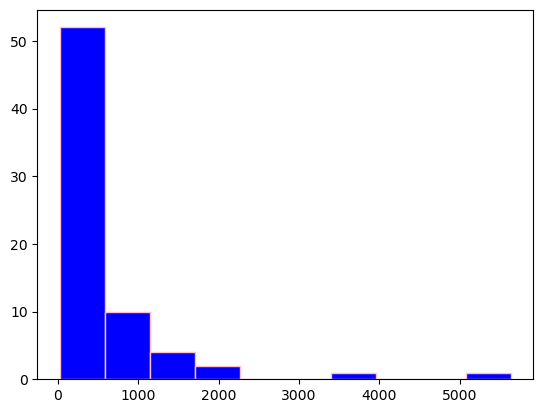

In [127]:
plt.hist(qq['Total_Medals'], color='blue', edgecolor='pink', bins=10)

In [128]:
# Create a histrogram of the number of countries with gold medals using 10 bins. 
qq = pk.groupby(["NOC","Medal"])["Medal"].count().reset_index(name='Tot_Medals')
qq.head()

,NOC,Medal,Tot_Medals
0,ANZ,1,5
1,ANZ,2,4
2,ANZ,3,20
3,ARG,1,91
4,ARG,2,92


In [129]:
gold = qq[qq['Medal'] > 2]
gold.head()

,NOC,Medal,Tot_Medals
2,ANZ,3,20
5,ARG,3,91
8,AUS,3,348
11,AUT,3,108
14,AZE,3,7


(array([58.,  8.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.0000e+00, 2.6560e+02, 5.2920e+02, 7.9280e+02, 1.0564e+03,
        1.3200e+03, 1.5836e+03, 1.8472e+03, 2.1108e+03, 2.3744e+03,
        2.6380e+03]),
 <BarContainer object of 10 artists>)

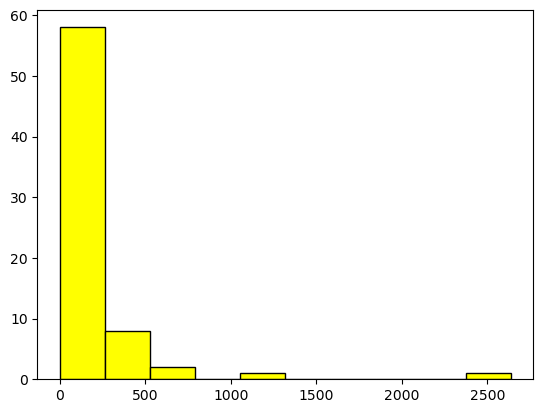

In [130]:
plt.hist(gold['Tot_Medals'], color='yellow', edgecolor='black', bins=10)

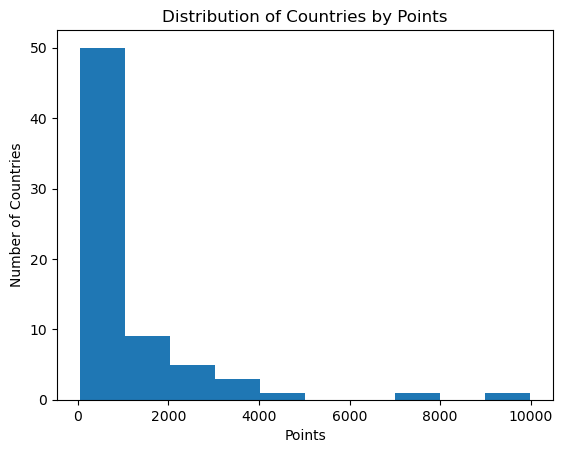

In [131]:
pk['Points'] = pk['Medal'].apply(lambda x: 3 if x == 1 else (2 if x == 2 else 1))
points = pk.groupby('NOC')['Points'].sum()

# Create the histogram with 10 bins
import matplotlib.pyplot as plt
plt.hist(points, bins=10)
plt.xlabel('Points')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries by Points')
plt.show()

In [132]:
pk.shape

(35669, 11)

# Q1(c)
(i) Create a bar chart of the number of medals for each sex. 
(ii) Create a bar chart of the number of medals for each season. 
(iii) Create a histogram of the frequency of the age of the athletes. 
(iv) Create a histogram of the frequency of the height of the athletes. 
(v) Create a histogram of the frequency of the weight of the athletes. 
Comment on these results. (6 marks)

In [133]:
#Create a bar chart of the number of medals for each sex. 
x=pk.groupby(['Sex'])['Medal'].count().reset_index(name='Tot_Medals')
print(x)

   Sex  Tot_Medals
0    0       25765
1    1        9904


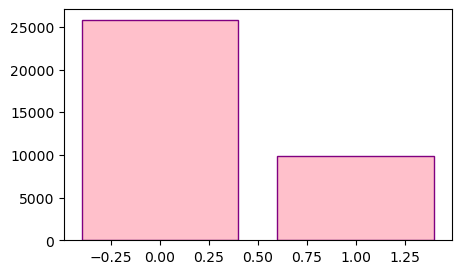

In [134]:
Sex=x['Sex']
Tot_Medal=x['Tot_Medals']
fig = plt.figure(figsize =(5, 3))
plt.bar(Sex,Tot_Medal,color='pink',edgecolor='purple')
plt.show()

In [135]:
#Create a bar chart of the number of medals for each season.
x1=pk.groupby(['Season'])['Medal'].count().reset_index(name='Total_Medal')
print(x1)

   Season  Total_Medal
0       0        30686
1       1         4983


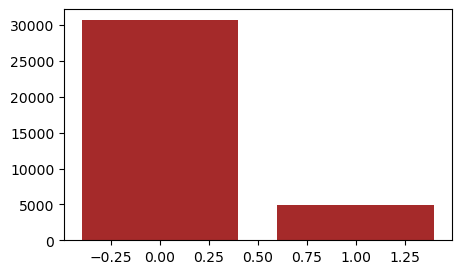

In [136]:
Season=x1['Season']
Total_Medal=x1['Total_Medal']
fig = plt.figure(figsize =(5, 3))
plt.bar(Season,Total_Medal,color='brown')
plt.show()

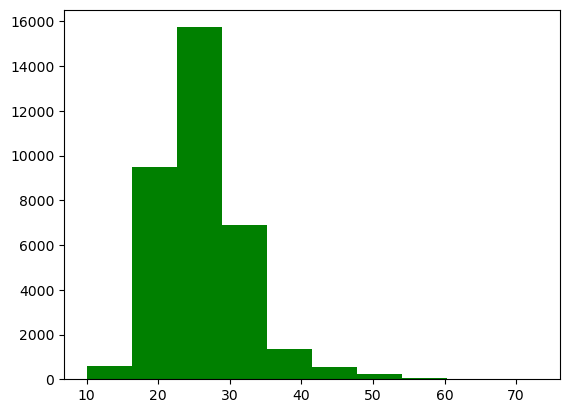

In [137]:
#Create a histogram of the frequency of the age of the athletes
age=pk['Age']
plt.hist(age, bins=10,color='green')
plt.show()

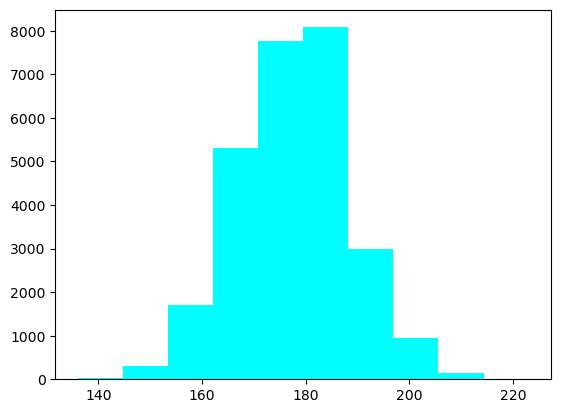

In [138]:
#Create a histogram of the frequency of the athletes height.
height=pk['Height']
plt.hist(height, bins=10,color='cyan')
plt.show()

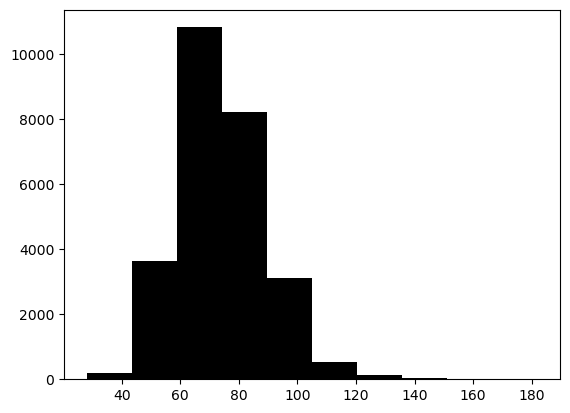

In [139]:
#Create a histogram of the frequency of the athletes weight.
weight=pk['Weight']
plt.hist(weight, bins=10,color='black')
plt.show()

In [140]:
pk.shape

(35669, 11)

# Q1(d)
Remove all the rows which have 'NaN' in the 'Height' or 'Weight' columns. Make a scatter plot of "Weight" and "Height" and colour the points using "Sex". Create a new column called "BMI" equal to the "Weight" divided by the ("Height"/100)^2. Make a scatter plot of "BMI" and "Weight" and colour the points using "Sex". Create a correlation matrix and discuss your results. (6 marks)

In [141]:
#Remove all the rows which have ‘NaN’ in the ‘Height’ or ‘Weight’ columns.
pk=pk[pd.notnull(pk['Weight'])&(pk['Height'])]
pk.shape

(26437, 11)

In [142]:
#Make a scatter plot of "Weight" and "Height" and colour the points using "Sex". 
#Dividing into Sex 0 and 1
pkM = pk[pk.Sex == 0]
pkF = pk[pk.Sex == 1]

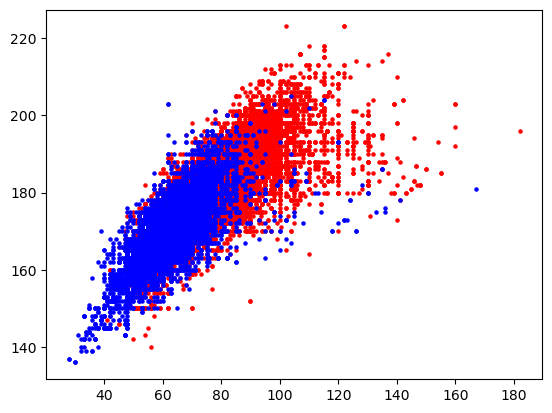

In [143]:
plt.scatter(pkM.Weight, pkM.Height,s=5, color='red')           
plt.scatter(pkF.Weight, pkF.Height,s=5, color='blue')
plt.show()

In [144]:
pk["bmi"] = (pk["Weight"] / pk["Height"]/100**2)

In [145]:
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,Points,bmi
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1,3,0.000046
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1,3,0.000037
42,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Team All-Around,3,1,0.000037
44,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Horse Vault,3,1,0.000037
48,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Pommelled Horse,3,1,0.000037


In [146]:
#Make a scatter plot of "BMI" and "Weight" and colour the points using "Sex".
#Dividing into Sex 0 and 1
pkM = pk[pk.Sex == 0]
pkF = pk[pk.Sex == 1]

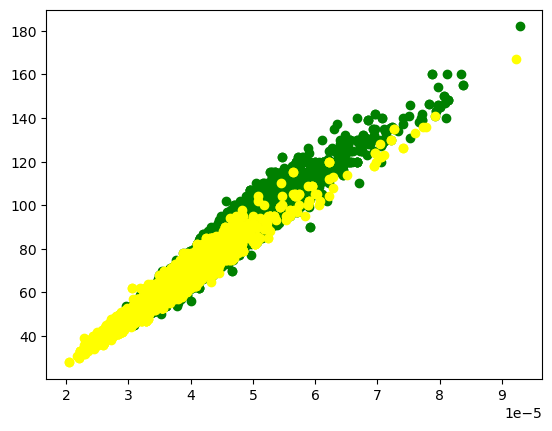

In [147]:
plt.scatter(pkM.bmi, pkM.Weight, color='green')           
plt.scatter(pkF.bmi, pkF.Weight, color='yellow')
plt.show()

In [148]:
pk.corr()

,Sex,Age,Height,Weight,Year,Season,Medal,Points,bmi
Sex,1.000000,-0.118879,-0.470853,-0.502817,0.252534,0.010973,-0.009598,0.009598,-0.471046
Age,-0.118879,1.000000,0.096922,0.158269,0.112662,0.043224,-0.013592,0.013592,0.171362
Height,-0.470853,0.096922,1.000000,0.803173,0.025421,-0.080258,0.037632,-0.037632,0.649739
Weight,-0.502817,0.158269,0.803173,1.000000,0.015696,-0.027479,0.023186,-0.023186,0.972902
Year,0.252534,0.112662,0.025421,0.015696,1.000000,0.107219,-0.033639,0.033639,0.003857
Season,0.010973,0.043224,-0.080258,-0.027479,0.107219,1.000000,-0.009207,0.009207,-0.000191
Medal,-0.009598,-0.013592,0.037632,0.023186,-0.033639,-0.009207,1.000000,-1.000000,0.014470
Points,0.009598,0.013592,-0.037632,-0.023186,0.033639,0.009207,-1.000000,1.000000,-0.014470
bmi,-0.471046,0.171362,0.649739,0.972902,0.003857,-0.000191,0.014470,-0.014470,1.000000


# Q1(e)
When "Sex" equals 0, remove all rows with "Age" greater than 43, or "Age" less than 18, or "Height" less than 158, or "Height" greater than 205, or "Weight" less than 52 or "Weight" greater than 120. When "Sex" equals 1, remove all rows with "Age" greater than 39, or "Age" less than 15, or "Height" less than 148, or "Height" greater than 193, or "Weight" less than 40 or "Weight" greater than 94. Remove rows with "Year"'s less than 1948 and remove "Season"'s equal to 1. Remove the "Season" column. Now remove "Sports" which have less than 200 medals. Now make a bar chart of the number of medals in each "Sport". Comment on this. Now remove the "Events" column. Name your dataframe "dfe". (6 marks)

In [149]:
#When ‘Sex’ equals 0, remove all rows with ‘Age’ greater than 43, or ‘Age’ less than 18, or ‘Height’ less than 158, or ‘Height’ greater than 205, or ‘Weight’ less than 52 or ‘Weight’ greater than 120.
pk2 = pk[pk['Sex'] == 0] #Filtered for sex=0
pk2= pk2[(pk2['Age']<=43) & (pk2['Age']>=18)]
pk2 =pk2[(pk2['Height']>=158) & (pk2['Height']<=205 )]
pk2 =pk2[(pk2['Weight']>=52) & (pk2['Weight']<=120)]
pk2.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,Points,bmi
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1,3,0.000046
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1,3,0.000037
42,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Team All-Around,3,1,0.000037
44,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Horse Vault,3,1,0.000037
48,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Pommelled Horse,3,1,0.000037


In [150]:
#When ‘Sex’ equals 1, remove all rows with ‘Age’ greater than 39, or ‘Age’ less than 15, or ”Height” less than 148, or ‘Height’ greater than 193, or ‘Weight’ less than 40 or ”Weight” greater than 94.

pk3 = pk[pk['Sex'] == 1] #Filtered for sex=1
pk3= pk3[(pk3['Age']<=39) & (pk3['Age']>=15)]
pk3 =pk3[(pk3['Height']>=148) & (pk3['Height']<=193 )]
pk3 =pk3[(pk3['Weight']>=40) & (pk3['Weight']<=94)]
pk3.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,Points,bmi
105,1,23.0,182.0,64.0,NOR,1996,0,Football,Football Women's Football,1,3,0.000035
161,1,21.0,165.0,49.0,AZE,2016,0,Taekwondo,Taekwondo Women's Flyweight,1,3,0.000030
286,1,23.0,191.0,88.0,USA,2008,0,Softball,Softball Women's Softball,2,2,0.000046
311,1,20.0,175.0,56.0,USA,2004,0,Taekwondo,Taekwondo Women's Featherweight,2,2,0.000032
476,1,21.0,173.0,59.0,CAN,1984,0,Swimming,Swimming Women's 4 x 100 metres Medley Relay,1,3,0.000034


In [151]:
y=[pk2, pk3]
pk = pd.concat(y)
pk.shape

(25151, 12)

In [152]:
#Remove rows with ‘Year’s less than 1948 
pk = pk[(pk['Year'] >=1948)]
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,Points,bmi
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1,3,0.000046
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1,3,0.000037
42,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Team All-Around,3,1,0.000037
44,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Horse Vault,3,1,0.000037
48,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Pommelled Horse,3,1,0.000037


In [153]:
#remove ‘Season’s equal to 1.
pk =pk[~(pk['Season'] == 1)]
pk.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,Points,bmi
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1,3,0.000037
42,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Team All-Around,3,1,0.000037
44,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Horse Vault,3,1,0.000037
48,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Pommelled Horse,3,1,0.000037
50,0,32.0,175.0,64.0,FIN,1952,0,Gymnastics,Gymnastics Men's Team All-Around,1,3,0.000037


In [154]:
pk.shape

(19731, 12)

In [155]:
#Remove the ‘Season’ column.
pk=pk.drop(['Season'], axis=1)

In [156]:
#remove ‘Sports’ which have less than 200 medals.
z=pk.groupby('Sport')['Medal'].count()
z.head()

Sport
Archery              190
Art Competitions       1
Athletics           2294
Badminton            140
Baseball             332
Name: Medal, dtype: int64

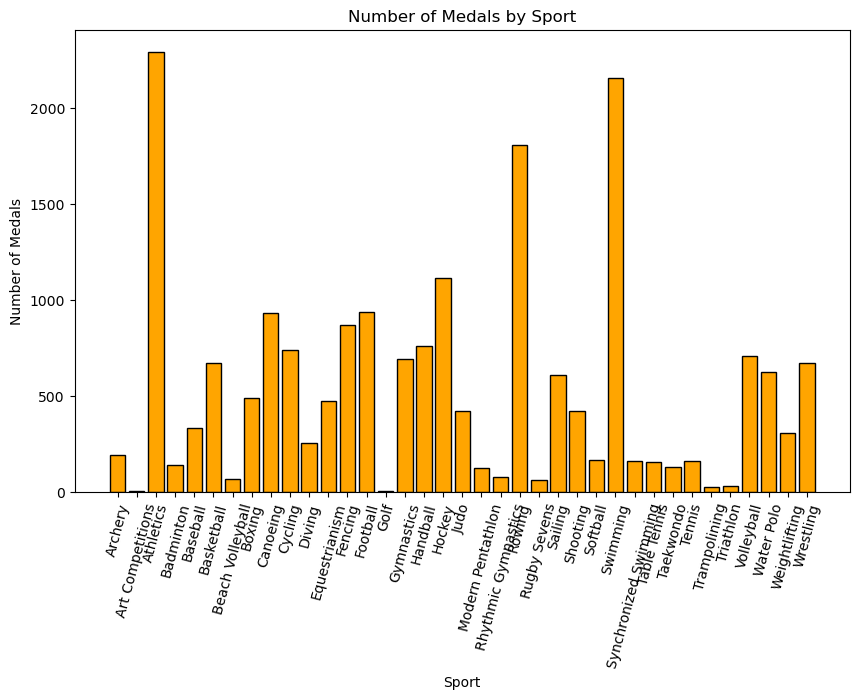

In [157]:
#A bar chart of the number of medals in each ‘Sport’ using Matplotlib.
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(z.index, z.values, color='orange',edgecolor='black')
ax.set_title('Number of Medals by Sport')
ax.set_xlabel('Sport')
ax.set_ylabel('Number of Medals')
plt.xticks(rotation=75)
plt.show()

In [158]:
# Group by sport and count the number of medals
sports_pk = pk.groupby('Sport').agg({'Medal': 'count'})

In [159]:
# Filter out sports with less than 200 medals
sports_pk = sports_pk[sports_pk['Medal'] >= 200]
# Create a list of sports to keep
keep_sports = sports_pk.index.tolist()

In [160]:
# Filter the original dataframe to keep only the desired sports and drop the "Events" column
dfe = pk[pk['Sport'].isin(keep_sports)].drop('Event', axis=1)
dfe.head()

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,Points,bmi
41,0,28.0,175.0,64.0,FIN,1948,Gymnastics,1,3,0.000037
42,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,1,0.000037
44,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,1,0.000037
48,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,1,0.000037
50,0,32.0,175.0,64.0,FIN,1952,Gymnastics,1,3,0.000037


In [161]:
dfe.shape 

(18260, 10)

# Q1(f)
Normalise the "Age", "Height", "Weight", "Year", "Medal" and "BMI" columns. In this part of the question just consider the case when the "Sport" equals "Baseball". You should split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict "NOC" using the normalised values "Sex", "Age", "Height", "Weight", "Year", "Medal" and "BMI". Test your model using the test data set. Discuss your results. (6 marks) 

In [162]:
#Normalise the "Age", "Height", "Weight", "Year", "Medal" and "BMI" columns.
dfe1=pd.DataFrame(dfe)
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()

dfe1.loc[:,['Age','Height','Weight','Year', 'Medal', 'bmi']] = MinMax.fit_transform(dfe1.loc[:,['Age','Height','Weight','Year', 'Medal', 'bmi']].to_numpy())
dfe1.head()

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,Points,bmi
41,0,0.464286,0.473684,0.3,FIN,0.000000,Gymnastics,0.0,3,0.251242
42,0,0.464286,0.473684,0.3,FIN,0.000000,Gymnastics,1.0,1,0.251242
44,0,0.464286,0.473684,0.3,FIN,0.000000,Gymnastics,1.0,1,0.251242
48,0,0.464286,0.473684,0.3,FIN,0.000000,Gymnastics,1.0,1,0.251242
50,0,0.607143,0.473684,0.3,FIN,0.058824,Gymnastics,0.0,3,0.251242


In [163]:
#In this part of the question just consider the case when the ‘Sport’ equals ‘Baseball’.
dfe1 = dfe1[dfe1['Sport'] == 'Baseball']
dfe1['Sex'] = dfe1['Sex'].astype(float)
dfe1['bmi'] = dfe1['bmi'].astype(float)
dfe1.head()

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,Points,bmi
739,0.0,0.250000,0.596491,0.5500,USA,0.764706,Baseball,1.0,1,0.462165
2672,0.0,0.464286,0.614035,0.5625,JPN,0.823529,Baseball,0.0,3,0.468642
2696,0.0,0.250000,0.684211,0.5500,USA,0.764706,Baseball,1.0,1,0.435001
2798,0.0,0.428571,0.473684,0.6625,CUB,0.647059,Baseball,1.0,1,0.616003
2799,0.0,0.571429,0.473684,0.6625,CUB,0.705882,Baseball,1.0,1,0.616003


In [164]:
print(dfe1.isnull().sum())

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Sport     0
Medal     0
Points    0
bmi       0
dtype: int64


In [165]:
#split the data into (80%) training data and (20%) test data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
values = ['Sex', 'Age','Height','Weight','Year', 'Medal', 'bmi']
x = dfe1.loc[:, values]
y = dfe1.loc[:, ['NOC']]


In [166]:
print(x.shape)
print(y.shape)

(332, 7)
(332, 1)


In [167]:
lencoder = LabelEncoder()
y = lencoder.fit_transform(y)

/Users/pawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, train_size = .80)

In [169]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(265, 7)
(67, 7)
(265,)
(67,)


In [170]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 106062 to 133919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     265 non-null    float64
 1   Age     265 non-null    float64
 2   Height  265 non-null    float64
 3   Weight  265 non-null    float64
 4   Year    265 non-null    float64
 5   Medal   265 non-null    float64
 6   bmi     265 non-null    float64
dtypes: float64(7)
memory usage: 16.6 KB


In [171]:
#linear model from sklearn to predict ‘NOC’ using the normalised values 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [172]:
print(y_pred[0:5])
print(y_test[0:5])

[1 2 1 5 1]
[3 2 1 5 1]


In [173]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print(score)

0.582089552238806


In [174]:
#check if its working
#['Sex', 'Age','Height','Weight','Year', 'Medal', 'bmi']
data = [0,0.22,0.57,0.56,0.6,1,0.4]
test_preds = model.predict([data])
test_preds

/Users/pawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [175]:
lencoder.classes_

array(['AUS', 'CUB', 'JPN', 'KOR', 'TPE', 'USA'], dtype=object)

In [176]:
lencoder.classes_[test_preds]

array(['CUB'], dtype=object)

# Q1(g)
You are now going to try to predict "NOC" when the "Sport" column is "Baseball". Now split the data into (80%) training data and (20%) test data. Create any regression model you like using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (6 marks)

In [177]:
import torch
torch.__version__

'2.0.0'

In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# Encode the 'NOC' column using label encoder
encoder = LabelEncoder()
dfe1['NOC_num'] = encoder.fit_transform(dfe1['NOC'])

# Split the data into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    dfe1[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal', 'bmi']],
    dfe1['NOC_num'],
    test_size=0.2,
    random_state=42,
)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the PyTorch model
class BaseballModel(nn.Module):
    def __init__(self):
        super(BaseballModel, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, len(encoder.classes_))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BaseballModel()

# Define the loss function, optimizer, and learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the training data
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Report the training error
with torch.no_grad():
    outputs = model(X_train)
    _, predicted = torch.max(outputs.data, 1)
    train_error = (predicted != y_train).sum().item() / len(y_train)
    print(f'Training error: {train_error}')

# Evaluate the model on the test data
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    test_error = (predicted != y_test).sum().item() / len(y_test)
    print(f'Testing error: {test_error}')


Epoch 0, Loss: 1.7487523555755615
Epoch 100, Loss: 1.566906213760376
Epoch 200, Loss: 1.45191490650177
Epoch 300, Loss: 1.4071273803710938
Epoch 400, Loss: 1.3335152864456177
Epoch 500, Loss: 1.2177047729492188
Epoch 600, Loss: 1.1048552989959717
Epoch 700, Loss: 1.022525668144226
Epoch 800, Loss: 0.9556784629821777
Epoch 900, Loss: 0.8926271796226501
Training error: 0.37735849056603776
Testing error: 0.29850746268656714


# Q1(h) 
Using your dataset obtained in Q1(e), create a new dataframe called "new_df". Create a list called "Rownames" using the 
69 "NOC" values which you will use as the row names. Create a list called "Columnames" using the 22 "Sport" values which you will use as the column names. The values in "new_df" should represent the total numer of points (i.e. the total of the "Medal" number) each NOC "gets" in each "Sport". Obtain the correleation matrix of "new_df". Discuss your results. Write "new_df" to a csv file and read this into R. In R, create 4 different plots to illustrate some statistical properties of "new_df". Discuss any significant results. (10 marks)  

In [179]:
# pivot table to calculate the points for each NOC in each Sport
new_df = pd.pivot_table(dfe, values='Medal', index='NOC', columns='Sport', aggfunc=np.sum, fill_value=0)

# Set the row names & column names
Rownames = list(dfe['NOC'].unique())
Columnames = list(dfe['Sport'].unique())
new_df.index = Rownames
new_df.columns = Columnames
new_df.head()

,Gymnastics,Rowing,Fencing,Canoeing,Handball,Water Polo,Wrestling,Sailing,Athletics,Hockey,...,Baseball,Swimming,Cycling,Football,Judo,Equestrianism,Shooting,Weightlifting,Volleyball,Diving
FIN,7,0,36,3,0,6,0,2,0,135,...,148,4,3,19,0,1,12,0,0,0
NED,131,48,80,4,62,146,25,60,0,0,...,352,2,207,104,20,634,0,65,3,0
ITA,10,0,0,0,7,0,0,9,0,0,...,0,11,10,27,12,5,0,0,0,0
ESP,0,0,0,9,3,0,0,0,0,0,...,0,8,0,0,3,0,0,0,0,38
BLR,71,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0


In [180]:
corr_matrix = new_df.corr()
corr_matrix

,Gymnastics,Rowing,Fencing,Canoeing,Handball,Water Polo,Wrestling,Sailing,Athletics,Hockey,...,Baseball,Swimming,Cycling,Football,Judo,Equestrianism,Shooting,Weightlifting,Volleyball,Diving
Gymnastics,1.000000,0.306160,0.861224,0.647716,0.298932,0.462955,0.575473,0.705025,0.193167,0.555895,...,0.190745,0.175007,0.634178,0.664448,0.636551,0.927243,0.455930,0.406145,0.237538,0.507289
Rowing,0.306160,1.000000,0.323489,0.716334,-0.044456,0.026725,0.155502,0.101371,-0.011181,0.085594,...,0.014799,0.450991,0.064768,0.141164,0.166363,0.324647,0.419753,0.106254,0.057504,0.356711
Fencing,0.861224,0.323489,1.000000,0.554457,0.009352,0.194316,0.572689,0.422709,0.080004,0.455326,...,0.024906,0.088453,0.332043,0.586793,0.533123,0.923494,0.499469,0.536284,0.228290,0.511071
Canoeing,0.647716,0.716334,0.554457,1.000000,0.258637,0.366009,0.392500,0.485976,0.341329,0.408233,...,0.074323,0.339860,0.457667,0.372963,0.546793,0.576954,0.482764,0.337429,0.312305,0.475617
Handball,0.298932,-0.044456,0.009352,0.258637,1.000000,0.590409,0.135560,0.654414,0.595000,0.578363,...,0.427038,0.220459,0.711184,0.307191,0.460108,0.233183,0.033600,0.331422,0.186316,0.268373
Water Polo,0.462955,0.026725,0.194316,0.366009,0.590409,1.000000,0.276179,0.894378,0.540054,0.390332,...,0.631741,0.350424,0.805753,0.682839,0.558802,0.417225,0.160827,0.221318,0.069232,0.099041
Wrestling,0.575473,0.155502,0.572689,0.392500,0.135560,0.276179,1.000000,0.390493,0.164330,0.334440,...,0.121100,0.160607,0.386117,0.407771,0.820749,0.625288,0.491690,0.265306,0.714006,0.312939
Sailing,0.705025,0.101371,0.422709,0.485976,0.654414,0.894378,0.390493,1.000000,0.426420,0.574817,...,0.592366,0.327402,0.910944,0.685484,0.636495,0.638704,0.266444,0.244008,0.135977,0.285044
Athletics,0.193167,-0.011181,0.080004,0.341329,0.595000,0.540054,0.164330,0.426420,1.000000,0.366670,...,0.090730,0.377595,0.354127,0.154740,0.519419,0.145319,0.175510,0.518885,0.199056,0.201352
Hockey,0.555895,0.085594,0.455326,0.408233,0.578363,0.390332,0.334440,0.574817,0.366670,1.000000,...,0.256229,0.293280,0.536838,0.452534,0.488698,0.511245,0.578146,0.360821,0.228531,0.398496


The matrix shows the correlation coefficient between each pair of sports, where a coefficient of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

The diagonal of the matrix shows the correlation of each sport with itself, which is always 1. The off-diagonal elements show the correlation between two different sports.

For example, the correlation coefficient between Gymnastics and Rowing is 0.306, which indicates a weak positive correlation. On the other hand, the correlation coefficient between Gymnastics and Fencing is 0.861, which indicates a strong positive correlation.

In [181]:
# Assuming df is your DataFrame
new_df.reset_index(inplace=True) 
new_df.insert(loc=0, column='Country', value=new_df['index'])
new_df.drop(['index'], axis=1, inplace=True) 
new_df.head()

,Country,Gymnastics,Rowing,Fencing,Canoeing,Handball,Water Polo,Wrestling,Sailing,Athletics,...,Baseball,Swimming,Cycling,Football,Judo,Equestrianism,Shooting,Weightlifting,Volleyball,Diving
0,FIN,7,0,36,3,0,6,0,2,0,...,148,4,3,19,0,1,12,0,0,0
1,NED,131,48,80,4,62,146,25,60,0,...,352,2,207,104,20,634,0,65,3,0
2,ITA,10,0,0,0,7,0,0,9,0,...,0,11,10,27,12,5,0,0,0,0
3,ESP,0,0,0,9,3,0,0,0,0,...,0,8,0,0,3,0,0,0,0,38
4,BLR,71,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0


In [182]:
new_df.to_csv('df.csv')

# Q2(a)
Read in the csv file "Gross_Domestic_Product.csv" to create the dataframe "gdp_df". Create a column named "NOC" which takes the values of "Code". Now remove the columns named "Entity" and "Code". In the 'NOC' column, change all 'DEU's to 'GER' and remove all the rows which have "NOC" equals "RUS". Now make sure that your dataframes "gdp_df" and "dfe" have the same values of "NOC" and "Year" and remove rows with different values of "NOC" or different values of "Year". Remove the columns 'Sex', 'Sport', 'Age', 'Height', 'Weight' and 'BMI' from "dfe". (6 marks)

In [77]:
#Read in the csv file "Gross_Domestic_Product.csv" to create the dataframe "gdp_df".
data1 = pd.read_csv('~/Desktop/coursework/Gross_Domestic_Product.csv')
gdp_df=pd.DataFrame(data1)
gdp_df.head()

,Entity,Code,Year,GDP
0,Afghanistan,AFG,2002,7.228792e+09
1,Afghanistan,AFG,2003,7.867259e+09
2,Afghanistan,AFG,2004,7.978511e+09
3,Afghanistan,AFG,2005,8.874476e+09
4,Afghanistan,AFG,2006,9.349917e+09


In [78]:
gdp_df.shape

(10457, 4)

In [79]:
#Create a column named "NOC" which takes the values of "Code". 
gdp_df["NOC"]= gdp_df["Code"]
gdp_df.head()

,Entity,Code,Year,GDP,NOC
0,Afghanistan,AFG,2002,7.228792e+09,AFG
1,Afghanistan,AFG,2003,7.867259e+09,AFG
2,Afghanistan,AFG,2004,7.978511e+09,AFG
3,Afghanistan,AFG,2005,8.874476e+09,AFG
4,Afghanistan,AFG,2006,9.349917e+09,AFG


In [80]:
#remove the columns named "Entity" and "Code".
gdp_df=gdp_df.drop(['Entity', 'Code'], axis=1)
gdp_df.head()

,Year,GDP,NOC
0,2002,7.228792e+09,AFG
1,2003,7.867259e+09,AFG
2,2004,7.978511e+09,AFG
3,2005,8.874476e+09,AFG
4,2006,9.349917e+09,AFG


In [81]:
#In the 'NOC' column, change all 'DEU's to 'GER' 
gdp_df['NOC'].replace({"DEU": "GER"}, inplace=True)

#remove all the rows which have "NOC" equals "RUS".

gdp_df = gdp_df[gdp_df['NOC'] != 'RUS']

In [82]:
gdp_df.head()

,Year,GDP,NOC
0,2002,7.228792e+09,AFG
1,2003,7.867259e+09,AFG
2,2004,7.978511e+09,AFG
3,2005,8.874476e+09,AFG
4,2006,9.349917e+09,AFG


In [83]:
dfe.head()

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,Points,bmi
41,0,0.464286,0.473684,0.3,FIN,1948,Gymnastics,1,3,0.251242
42,0,0.464286,0.473684,0.3,FIN,1948,Gymnastics,3,1,0.251242
44,0,0.464286,0.473684,0.3,FIN,1948,Gymnastics,3,1,0.251242
48,0,0.464286,0.473684,0.3,FIN,1948,Gymnastics,3,1,0.251242
50,0,0.607143,0.473684,0.3,FIN,1952,Gymnastics,1,3,0.251242


In [84]:
# Make sure that your dataframes 'gdp_df' and 'dfe' have the same values of 'NOC' and 'Year' 
dfe = dfe.merge(gdp_df, on=['NOC', 'Year'], how='inner')

In [85]:
# Remove the columns 'Sex', 'Sport', 'Age', 'Height', 'Weight' and 'BMI' from 'dfe'
dfe = dfe.drop(['Sex', 'Sport', 'Age', 'Height', 'Weight', 'bmi'], axis=1)
dfe.head()

,NOC,Year,Medal,Points,GDP
0,ITA,2016,1,3,1.860000e+12
1,ITA,2016,1,3,1.860000e+12
2,ITA,2016,2,2,1.860000e+12
3,ITA,2016,3,1,1.860000e+12
4,ITA,2016,2,2,1.860000e+12


In [86]:
dfe = dfe.groupby(['NOC', 'Year'], as_index=False).agg({'GDP': 'mean', 'Medal': 'sum'})

In [87]:
dfe.shape

(452, 4)

# Q2(b)
Read in the csv file "Demographic_Indicators.csv" to create the dataframe "dmg_df". Rename the columns "ISO3_code" as "NOC", "Time" as "Year" and "TPopulation1July" as "Population". In the 'NOC' column, change all 'DEU's to 'GER' and remove all the rows which have "NOC" equals "RUS". Now make sure that your dataframes "dmg_df" and "dfe" have the same values of "NOC" and "Year" and remove rows with different values of "NOC" or different values of "Year". Combine "dfe", "gdp_df" and "dmg_df" into a single dataframe called "com_df". Remove any rows with missing values. Don't forget to reset the index. (7 marks)

In [88]:
#Read in the csv file "Demographic_Indicators.csv" to create the dataframe "dmg_df".
data2 = pd.read_csv('~/Desktop/coursework/Demographic_Indicators.csv')
dmg_df = pd.DataFrame(data2)
dmg_df.head()

,SortOrder,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,NaN,World,1950,2477674.732,2499322.157,1245362.964,1253959.192,19.1661,99.3145,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,NaN,World,1951,2520969.582,2543130.380,1267473.182,1275657.198,19.5020,99.3584,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,NaN,World,1952,2565291.179,2590270.898,1291399.982,1298870.917,19.8635,99.4248,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,NaN,World,1953,2615250.618,2640278.797,1316659.222,1323619.574,20.2470,99.4741,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,NaN,World,1954,2665306.975,2691979.339,1342923.171,1349056.168,20.6435,99.5454,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [89]:
#Rename the columns ‘ISO3 code’ as ‘NOC’, ‘Time” as ‘Year’ and ‘TPopulation1July’ as ‘Population’.
dmg_df.rename(columns={'ISO3_code': 'NOC', 'Time': 'Year','TPopulation1July': 'Population'}, inplace=True)
dmg_df.head()

,SortOrder,NOC,Location,Year,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,NaN,World,1950,2477674.732,2499322.157,1245362.964,1253959.192,19.1661,99.3145,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,NaN,World,1951,2520969.582,2543130.380,1267473.182,1275657.198,19.5020,99.3584,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,NaN,World,1952,2565291.179,2590270.898,1291399.982,1298870.917,19.8635,99.4248,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,NaN,World,1953,2615250.618,2640278.797,1316659.222,1323619.574,20.2470,99.4741,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,NaN,World,1954,2665306.975,2691979.339,1342923.171,1349056.168,20.6435,99.5454,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [90]:
#In the ‘NOC’ column, change all ‘DEU’s to ’GER’.
dmg_df['NOC'].replace({"DEU": "GER"}, inplace=True)
dmg_df.shape


(43472, 58)

In [91]:
#remove all the rows which have "NOC" equals "RUS".
dmg_df.drop(dmg_df.loc[dmg_df['NOC'] == "RUS"].index, inplace=True)
dmg_df.head()

,SortOrder,NOC,Location,Year,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,NaN,World,1950,2477674.732,2499322.157,1245362.964,1253959.192,19.1661,99.3145,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,NaN,World,1951,2520969.582,2543130.380,1267473.182,1275657.198,19.5020,99.3584,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,NaN,World,1952,2565291.179,2590270.898,1291399.982,1298870.917,19.8635,99.4248,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,NaN,World,1953,2615250.618,2640278.797,1316659.222,1323619.574,20.2470,99.4741,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,NaN,World,1954,2665306.975,2691979.339,1342923.171,1349056.168,20.6435,99.5454,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [92]:
# Select required columns
dfe = dfe[['NOC', 'Year', 'Medal']]
dfe.head()

,NOC,Year,Medal
0,ARG,1960,3
1,ARG,1964,2
2,ARG,1968,2
3,ARG,1972,2
4,ARG,1988,12


In [93]:
# Merge dataframes on 'NOC' and 'Year'
com_df = pd.merge(dfe, gdp_df, on=['NOC', 'Year'])
com_df = pd.merge(com_df, dmg_df, on=['NOC', 'Year'])

In [94]:
com_df.head()

,NOC,Year,Medal,GDP,SortOrder,Location,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,ARG,1960,3,1.510000e+11,243,Argentina,20187.607,20349.744,10191.482,10158.262,...,332.1330,227.3884,105.9609,131.2627,79.9835,219.0491,269.0976,163.4275,20.399,1.003
1,ARG,1964,2,1.640000e+11,243,Argentina,21536.740,21708.487,10831.794,10876.694,...,332.0506,218.4094,104.6508,132.3945,76.3385,215.5525,270.3490,156.2180,32.322,1.490
2,ARG,1968,2,1.950000e+11,243,Argentina,22934.883,23112.971,11495.179,11617.792,...,330.0184,207.5167,104.2727,134.2454,73.6366,212.0304,271.7889,148.9195,39.985,1.731
3,ARG,1972,2,2.370000e+11,243,Argentina,24414.150,24612.794,12193.317,12419.477,...,315.6050,195.6578,101.9246,130.5863,72.6563,205.0624,263.8225,144.3164,36.601,1.488
4,ARG,1988,12,2.940000e+11,243,Argentina,31452.216,31690.792,15589.854,16100.938,...,239.5328,147.2644,79.8924,98.7374,60.9183,164.3508,208.9540,119.5845,30.243,0.955


In [95]:
com_df=com_df.dropna(axis=0)

In [96]:
# reset the index
com_df.reset_index(drop=True, inplace=True)
com_df.head()

,NOC,Year,Medal,GDP,SortOrder,Location,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,ARG,1960,3,1.510000e+11,243,Argentina,20187.607,20349.744,10191.482,10158.262,...,332.1330,227.3884,105.9609,131.2627,79.9835,219.0491,269.0976,163.4275,20.399,1.003
1,ARG,1964,2,1.640000e+11,243,Argentina,21536.740,21708.487,10831.794,10876.694,...,332.0506,218.4094,104.6508,132.3945,76.3385,215.5525,270.3490,156.2180,32.322,1.490
2,ARG,1968,2,1.950000e+11,243,Argentina,22934.883,23112.971,11495.179,11617.792,...,330.0184,207.5167,104.2727,134.2454,73.6366,212.0304,271.7889,148.9195,39.985,1.731
3,ARG,1972,2,2.370000e+11,243,Argentina,24414.150,24612.794,12193.317,12419.477,...,315.6050,195.6578,101.9246,130.5863,72.6563,205.0624,263.8225,144.3164,36.601,1.488
4,ARG,1988,12,2.940000e+11,243,Argentina,31452.216,31690.792,15589.854,16100.938,...,239.5328,147.2644,79.8924,98.7374,60.9183,164.3508,208.9540,119.5845,30.243,0.955


# Q2(c)
Replace each value in the columns "GDP", "Population" and "Medal" by its logarithm to base e. 
Then normalise the columns "GDP", "Population" and "Medal" for each "Year". Now split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the number of points given in the column "Medal" using the normalised values "GDP" and "Population". Test your model using the test data set. Discuss your results. (7 marks) 

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [98]:
# Replace each value in the columns 'GDP', 'Population' and 'Medal' by its logarithm to base e
com_df[['GDP', 'Population', 'Medal']] = np.log(com_df[['GDP', 'Population', 'Medal']])

In [99]:
# Normalise the columns 'GDP', 'Population' and 'Medal' for each 'Year'
com_df[['GDP', 'Population', 'Medal']] = com_df.groupby('Year')[['GDP', 'Population', 'Medal']].apply(lambda x: (x - x.mean()) / x.std())


In [100]:
com_df.head()

,NOC,Year,Medal,GDP,SortOrder,Location,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,ARG,1960,-1.285170,-0.178872,243,Argentina,20187.607,-0.323653,10191.482,10158.262,...,332.1330,227.3884,105.9609,131.2627,79.9835,219.0491,269.0976,163.4275,20.399,1.003
1,ARG,1964,-1.440880,-0.082308,243,Argentina,21536.740,-0.306313,10831.794,10876.694,...,332.0506,218.4094,104.6508,132.3945,76.3385,215.5525,270.3490,156.2180,32.322,1.490
2,ARG,1968,-1.308464,0.077248,243,Argentina,22934.883,-0.222762,11495.179,11617.792,...,330.0184,207.5167,104.2727,134.2454,73.6366,212.0304,271.7889,148.9195,39.985,1.731
3,ARG,1972,-1.102274,0.206196,243,Argentina,24414.150,-0.048635,12193.317,12419.477,...,315.6050,195.6578,101.9246,130.5863,72.6563,205.0624,263.8225,144.3164,36.601,1.488
4,ARG,1988,-0.238135,-0.046354,243,Argentina,31452.216,-0.211701,15589.854,16100.938,...,239.5328,147.2644,79.8924,98.7374,60.9183,164.3508,208.9540,119.5845,30.243,0.955


In [101]:
#Split the data into 80% training data and 20% test data
X = com_df[['GDP', 'Population']]
y = com_df['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Train a linear model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make predictions using the test data
y_pred = model.predict(X_test)

In [104]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.540542024528623


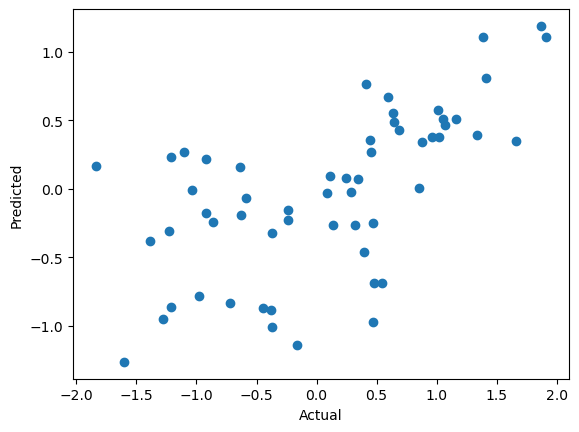

In [105]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

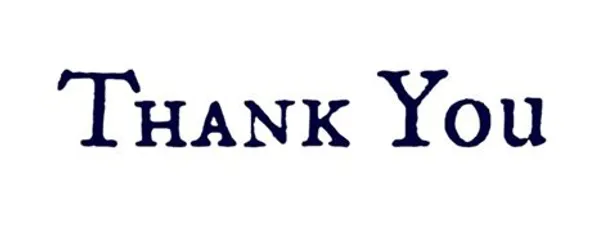